In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

# Part-1

<h3>a) Plot the graph Total Energy Consumed by the Residential Sector per month<h3>

In [43]:
dataset_df=pd.read_csv('Energy_Consumption_by_Sector_monthly.csv') 
newdataset_df=dataset_df.dropna(); # drop null value from dataset
newdataset_df

,Month,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector,Energy Consumption Balancing Item,Primary Energy Consumption Total
1,1973 January,1339.27,1957.641,657.977,1080.68,2027.033,2673.882,1504.805,1507.977,1691.096,3.693,7223.873
2,1973 February,1174.899,1712.143,623.759,1003.913,1841.299,2432.592,1438.298,1441.064,1511.458,2.654,6592.366
3,1973 March,983.374,1510.079,492.136,886.42,1926.411,2561.729,1561.293,1564.146,1559.159,-0.934,6521.439
4,1973 April,715.391,1183.421,363.393,736.851,1914.017,2540.02,1480.403,1483.064,1470.152,-1.627,5941.729
5,1973 May,535.914,1006.326,288.63,695.636,2076.468,2747.831,1622.115,1624.965,1551.631,-2.817,6071.94
...,...,...,...,...,...,...,...,...,...,...,...,...
563,2019 November,782.421,1811.487,499.315,1534.86,1954.74,2718.924,2287.971,2294.193,2835.016,-1.531,8357.934
564,2019 December,980.07,2172.491,588.337,1647.851,2002.992,2755.556,2322.102,2328.506,3010.903,-3.636,8900.768
565,2020 January,1038.399,2247.496,618.061,1670.65,2022.698,2778.895,2270.163,2277.145,3024.864,-9.681,8964.505
566,2020 February,931.947,2019.396,562.273,1553.325,1871.349,2605.877,2133.188,2139.22,2819.061,-6.454,8311.363


In [44]:
type(dataset_df['Month']) #converting month to date format for graph plotting
dataset_df['Date'] =  pd.to_datetime(dataset_df['Month'])
dataset_df['New_Energy'] = pd.to_numeric(dataset_df['Total Energy Consumed by the Residential Sector'], errors='coerce').round(2) #data cleaning , setting 2 values after decimal

In [45]:
dataset_df

,Month,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector,Energy Consumption Balancing Item,Primary Energy Consumption Total,Date,New_Energy
0,NaN,(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),NaT,NaN
1,1973 January,1339.27,1957.641,657.977,1080.68,2027.033,2673.882,1504.805,1507.977,1691.096,3.693,7223.873,1973-01-01,1957.64
2,1973 February,1174.899,1712.143,623.759,1003.913,1841.299,2432.592,1438.298,1441.064,1511.458,2.654,6592.366,1973-02-01,1712.14
3,1973 March,983.374,1510.079,492.136,886.42,1926.411,2561.729,1561.293,1564.146,1559.159,-0.934,6521.439,1973-03-01,1510.08
4,1973 April,715.391,1183.421,363.393,736.851,1914.017,2540.02,1480.403,1483.064,1470.152,-1.627,5941.729,1973-04-01,1183.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,2019 November,782.421,1811.487,499.315,1534.86,1954.74,2718.924,2287.971,2294.193,2835.016,-1.531,8357.934,2019-11-01,1811.49
564,2019 December,980.07,2172.491,588.337,1647.851,2002.992,2755.556,2322.102,2328.506,3010.903,-3.636,8900.768,2019-12-01,2172.49
565,2020 January,1038.399,2247.496,618.061,1670.65,2022.698,2778.895,2270.163,2277.145,3024.864,-9.681,8964.505,2020-01-01,2247.50
566,2020 February,931.947,2019.396,562.273,1553.325,1871.349,2605.877,2133.188,2139.22,2819.061,-6.454,8311.363,2020-02-01,2019.40


In [46]:
def plotLineGraph(x,y,graphLabel, title, xlabel,ylabel):
    rcParams['figure.figsize']=10,8 #graph formatting
    plt.plot(x,y, label=graphLabel);
    plt.legend();
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

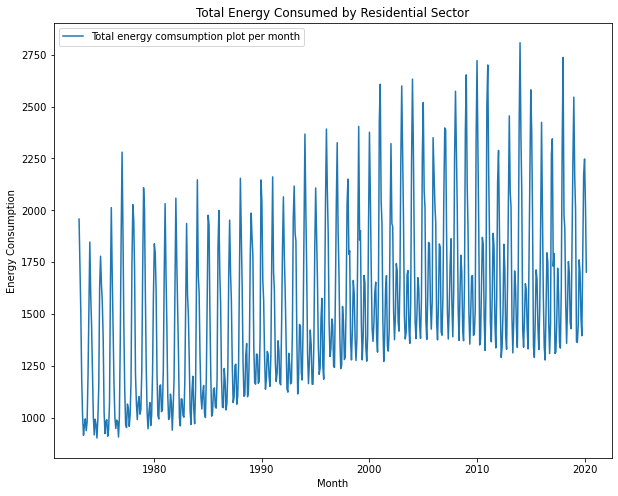

In [47]:
plotLineGraph(dataset_df['Date'],dataset_df['New_Energy'],'Total energy comsumption plot per month','Total Energy Consumed by Residential Sector'
             ,'Month','Energy Consumption')

<h3>b)Aggregate the data above into yearly values, and plot the yearly values <h3>

In [48]:
def GetYearFromDate(value):
    year=value.split(' ')[0] #splitting year from date for aggregation
    return year
dataset_df['Year']=newdataset_df.Month.map(lambda date: GetYearFromDate(date)) #adding a new column 'Year'
type(dataset_df['Year'])
dataset_df

,Month,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector,Energy Consumption Balancing Item,Primary Energy Consumption Total,Date,New_Energy,Year
0,NaN,(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),NaT,NaN,NaN
1,1973 January,1339.27,1957.641,657.977,1080.68,2027.033,2673.882,1504.805,1507.977,1691.096,3.693,7223.873,1973-01-01,1957.64,1973
2,1973 February,1174.899,1712.143,623.759,1003.913,1841.299,2432.592,1438.298,1441.064,1511.458,2.654,6592.366,1973-02-01,1712.14,1973
3,1973 March,983.374,1510.079,492.136,886.42,1926.411,2561.729,1561.293,1564.146,1559.159,-0.934,6521.439,1973-03-01,1510.08,1973
4,1973 April,715.391,1183.421,363.393,736.851,1914.017,2540.02,1480.403,1483.064,1470.152,-1.627,5941.729,1973-04-01,1183.42,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,2019 November,782.421,1811.487,499.315,1534.86,1954.74,2718.924,2287.971,2294.193,2835.016,-1.531,8357.934,2019-11-01,1811.49,2019
564,2019 December,980.07,2172.491,588.337,1647.851,2002.992,2755.556,2322.102,2328.506,3010.903,-3.636,8900.768,2019-12-01,2172.49,2019
565,2020 January,1038.399,2247.496,618.061,1670.65,2022.698,2778.895,2270.163,2277.145,3024.864,-9.681,8964.505,2020-01-01,2247.50,2020
566,2020 February,931.947,2019.396,562.273,1553.325,1871.349,2605.877,2133.188,2139.22,2819.061,-6.454,8311.363,2020-02-01,2019.40,2020


In [49]:
final_df=dataset_df.groupby('Year')['New_Energy'].mean().reset_index() #taking mean of all values of one year
final_df['Year'] =  pd.to_datetime(final_df['Year'])

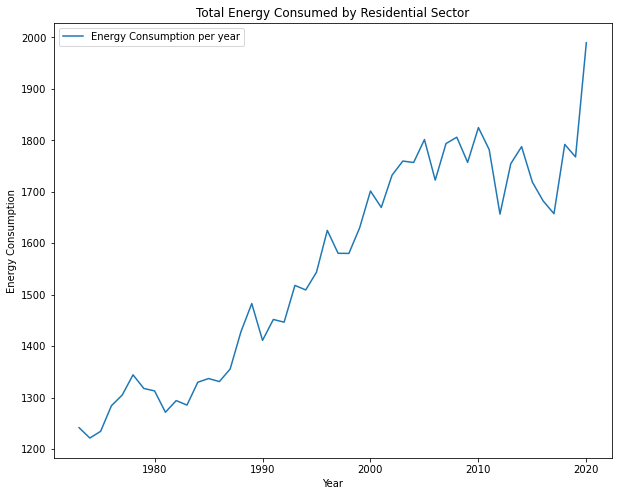

In [50]:
plotLineGraph(final_df['Year'],final_df['New_Energy'],'Energy Consumption per year',
             'Total Energy Consumed by Residential Sector'
             ,'Year','Energy Consumption')

<h1>Part-2<h1>

<h3> a) Loading the wine dataset<h3>

In [51]:
from sklearn.datasets import load_wine
(wine_df, target)=load_wine(return_X_y=True,as_frame=True)

In [52]:
# describe the dataset
wine_df
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<h3>b) Apply the MinMaxScaler() from the sklearn preprocessing library to the wine data to normalize it.<h3> 

Text(0.5, 1.0, 'After Scaling')

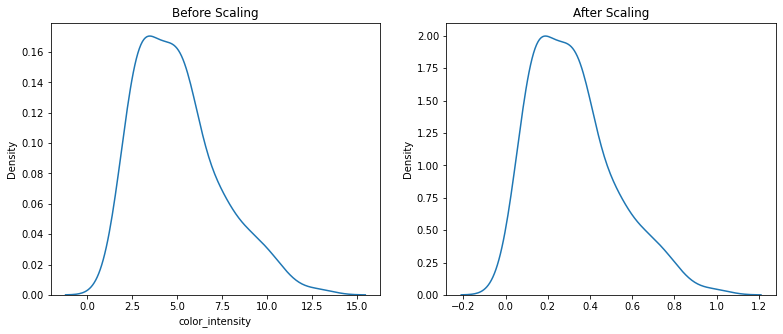

In [70]:
#graph for visualizing normalization effects on color_intensity column
plt.figure(figsize=(13,5))
plt.subplot(121)
sns.kdeplot(wine_df['color_intensity'])
plt.title('Before Scaling' )

plt.subplot(122)
scaled_data=MinMaxScaler().fit_transform(wine_df[['color_intensity']]).flatten()
wine_df['MinMaxScalerData'] = scaled_data
sns.kdeplot(scaled_data)
plt.title('After Scaling' )


In [71]:
wine_df['MinMaxScalerData'].describe() #describe normalized data

count    178.000000
mean       0.322363
std        0.197806
min        0.000000
25%        0.165529
50%        0.290956
75%        0.419795
max        1.000000
Name: MinMaxScalerData, dtype: float64

<h3>c)Apply the StandardScaler() from the sklearn preprocessing library to the wine data to standardize it <h3>

In [72]:
from matplotlib import rcParams
rcParams['figure.figsize']=12,8 #figure size
stdscaler=StandardScaler()
stdScaledData=stdscaler.fit_transform(wine_df)

Text(0.5, 1.0, 'After Scaling')

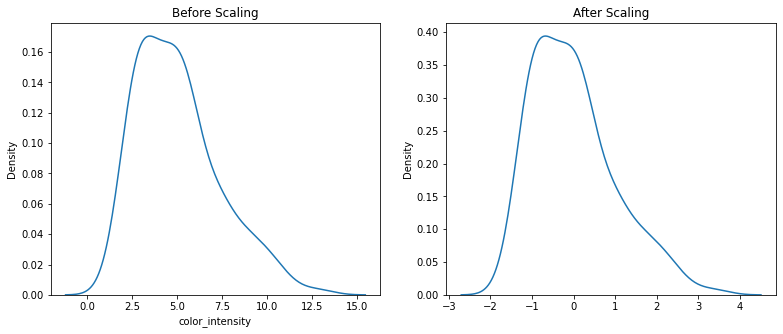

In [73]:
#graph for visualizing standardization effects on color_intensity column
plt.figure(figsize=(13,5))
plt.subplot(121)
sns.kdeplot(wine_df['color_intensity'])
plt.title('Before Scaling' )

plt.subplot(122)
scaled_data=StandardScaler().fit_transform(wine_df[['color_intensity']]).flatten()
wine_df['StandardScalarData'] = scaled_data
sns.kdeplot(scaled_data)
plt.title('After Scaling' )

In [68]:
wine_df['StandardScalarData'].describe() #describe standardized data

count    1.780000e+02
mean    -1.122697e-17
std      1.002821e+00
min     -1.634288e+00
25%     -7.951025e-01
50%     -1.592246e-01
75%      4.939560e-01
max      3.435432e+00
Name: StandardScalarData, dtype: float64

<h3>d) Apply the PCA library to the standardized data from c) <h3>

In [67]:
from sklearn.decomposition import PCA

In [66]:
wine_df.shape # know the original number of columns in dataset

(178, 15)

In [60]:
pca=PCA(n_components=8) #to retain 90% variance

In [61]:
pca.fit(stdScaledData)

PCA(n_components=8)

In [62]:
xpca=pca.transform(stdScaledData)

In [63]:
xpca.shape #know the number of columns in dataset

(178, 8)

In [64]:
dfGraph=pd.DataFrame(xpca)

Text(0.5, 1.0, 'PCA Graph')

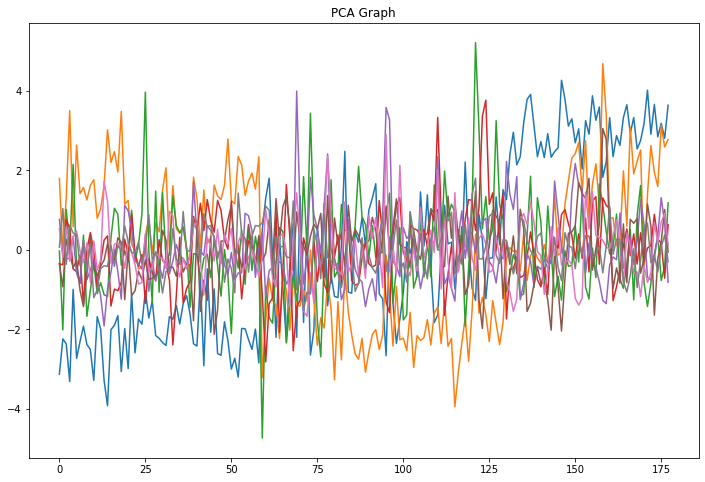

In [65]:
plt.plot(dfGraph)
plt.title('PCA Graph')

<h3>Determine the number of dimensions that can be reduced while capturing 90% of the variance in the data.<h3>

In [41]:
pca.explained_variance_ratio_

array([0.32979   , 0.26533122, 0.09831673, 0.06199444, 0.05782888,
       0.05221751, 0.03761897, 0.02326524])

When the dataset dimensionality was reduced by 5, i.e. number of columne got decreased from 13 to 8, we got the variance of ~90%.
It is clear from the above graph that dimensions were decreased.